In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr


In [3]:

# Read the data from the specified Excel file
df = pd.read_excel('Fig4_data.xlsx')


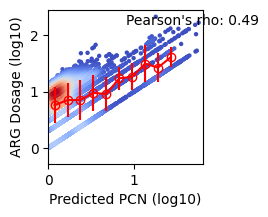

In [ ]:

# Extract columns for x0 and y0
x0 = df.iloc[:, 36]
y0 = df.iloc[:, 37]

# Transform x0 and y0 by taking the logarithm
x = np.log10(x0)
y1 = np.log10(y0)

# Calculate the point density
xy1 = np.vstack([x, y1])
z1 = gaussian_kde(xy1)(xy1)

# Sort the points by density, so that the densest points are plotted last
idx = z1.argsort()
x, y1, z1 = x[idx], y1[idx], z1[idx]

# Create bins for x-axis
num_bins = 10
bins = np.linspace(0, 1.5, num_bins + 1)
bin_indices = np.digitize(x, bins)

# Calculate binned averages of y values and their standard deviations
binned_y_means = []
binned_y_stds = []  # New list to store standard deviations
for i in range(1, num_bins + 1):
    bin_mask = bin_indices == i
    if np.any(bin_mask):
        bin_y_values = y1[bin_mask]
        binned_y_means.append(np.mean(bin_y_values))
        binned_y_stds.append(np.std(bin_y_values))  # Calculate standard deviation
    else:
        binned_y_means.append(np.nan)
        binned_y_stds.append(np.nan)

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate Pearson's correlation for log-transformed data (log10(x0) and log10(y0))
pearson_rho, p_value = pearsonr(x, y1)

# Create the scatter plot
plt.figure(figsize=(2, 2))
plt.scatter(x, y1, c=z1, s=10, edgecolor='none', cmap='coolwarm')

# Plot binned averages with error bars
plt.errorbar(bin_centers, binned_y_means, yerr=binned_y_stds, fmt='ro-', fillstyle='none', label='Binned Averages')

# Add Pearson's rho to the plot
plt.text(0.5, 0.9, f"Pearson's rho: {pearson_rho:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot limits and labels
plt.xlim(0, 1.8)
plt.xlabel('Predicted PCN (log10)')
plt.ylabel('ARG Dosage (log10)')

# Save the plot as a PDF
plt.savefig('Figure_4E.pdf', bbox_inches='tight')

